# Part 1 - Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression

from modules.stock import Stock
from modules.portfolio import Portfolio
from modules.performance import Performance, CollectPerformance
from modules.cleandata import CleanData
from modules.fourfactormodel import FourFactorModel

%matplotlib inline 

# Preparation

In [2]:
stock = Stock()

# Question 1.1 - 1.2

### bmit

In [3]:
s, d = stock.portfolio(kpi='bmit', highlow='high', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p0 = perf.get_performance('bmit high')

In [4]:
s, d = stock.portfolio(kpi='bmit', highlow='low', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p1 = perf.get_performance('bmit low')

In [5]:
s, d = stock.portfolio(kpi='bmit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p2 =perf.get_performance('bmit highlow')

### momit

In [6]:
s, d = stock.portfolio(kpi='momit', highlow='high', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p3 = perf.get_performance('momit high')

In [7]:
s, d = stock.portfolio(kpi='momit', highlow='low', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p4 = perf.get_performance('momit low')

In [8]:
s, d = stock.portfolio(kpi='momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p5 = perf.get_performance('momit high/low')

In [9]:
q1_perf = CollectPerformance([p0, p1, p2, p3, p4, p5])
q1_perf()

,avg months for stock,avg return,sharpe ratio,std. deviation,t-stat
index_name,,,,,
bmit high,24.552786,0.085271,0.519232,0.164225,11.863051
bmit low,24.552786,0.054189,0.265777,0.203888,6.072289
bmit highlow,49.105572,0.015541,0.180977,0.085873,4.134848
momit high,24.552786,0.098987,0.495019,0.199966,11.309850
momit low,24.552786,0.049807,0.236453,0.210641,5.402317
momit high/low,49.105572,0.024590,0.243627,0.100933,5.566228


# Question 1.3

In [10]:
stock.composite_data('bmit', 'momit')

In [11]:
s, d = stock.portfolio(kpi='bmit_momit', highlow='high', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p0 = perf.get_performance('composite high')

In [12]:
s, d = stock.portfolio(kpi='bmit_momit', highlow='low', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p1 = perf.get_performance('composite low')

In [13]:
s, d = stock.portfolio(kpi='bmit_momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p2 = perf.get_performance('composite high/low')

In [14]:
q3_perf = CollectPerformance([p0, p1, p2])
q3_perf()

,avg months for stock,avg return,sharpe ratio,std. deviation,t-stat
index_name,,,,,
composite high,24.552786,0.089310,0.556989,0.160345,12.725694
composite low,24.552786,0.033185,0.164571,0.201643,3.760016
composite high/low,49.105572,0.028063,0.409929,0.068458,9.365785


# Question 1.4

In [15]:
stock.industry_adjusted_data('bmit')
stock.industry_adjusted_data('momit')
stock.composite_data('adjusted_bmit', 'adjusted_momit')

In [16]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='high', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p0 = perf.get_performance('composite adjusted high')

In [17]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='low', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p1 = perf.get_performance('composite adjusted low')

In [18]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p2 = perf.get_performance('composite adjusted high/low')

In [19]:
q3_perf = CollectPerformance([p0, p1, p2])
q3_perf()

,avg months for stock,avg return,sharpe ratio,std. deviation,t-stat
index_name,,,,,
composite adjusted high,24.552786,0.099110,0.586594,0.168959,13.402109
composite adjusted low,24.552786,0.045012,0.235327,0.191274,5.376589
composite adjusted high/low,49.105572,0.027049,0.576088,0.046953,13.162071


# Question 1.5

### Four Factor Model

In [43]:
s, d = stock.portfolio(kpi='bmit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [58]:
t.regress_model(model_name = 'BMIT')
res = t.get_results()
pred = t.get_prediction()
#t.results_to_latex('res_q5')
res

,HML,MKT,SMB,WML,intercept,r2
BMIT,0.335481,-0.022651,0.058716,0.309474,-0.001034,0.635355


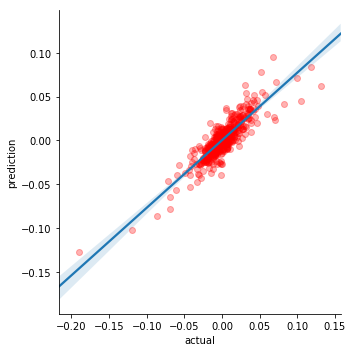

In [49]:
sbn_plot = sbn.lmplot('actual','prediction',data=pred, scatter_kws={'alpha':0.3, 'color':'red'})
#sbn_plot.save_fig('')

In [50]:
s, d = stock.portfolio(kpi='momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [51]:
t.regress_model(model_name = 'MOMIT')
res = t.get_results()
pred = t.get_prediction()
#t.results_to_latex('res_q5')
res

,HML,MKT,SMB,WML,intercept,r2
MOMIT,-0.076046,-0.010208,0.139771,0.572363,-0.001892,0.809781


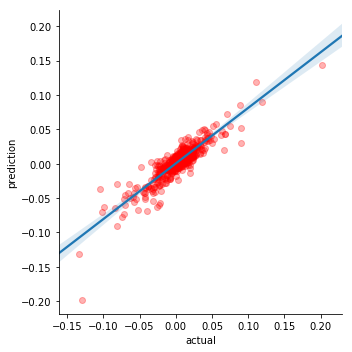

In [52]:
sbn_plot = sbn.lmplot('actual','prediction',data=pred, scatter_kws={'alpha':0.3, 'color':'red'})
#sbn_plot.save_fig('')

In [53]:
s, d = stock.portfolio(kpi='bmit_momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [57]:
t.regress_model(model_name = 'BMIT_MOMIT')
res = t.get_results()
pred = t.get_prediction()
#t.results_to_latex('res_q5')
res

,HML,MKT,SMB,WML,intercept,r2
BMIT_MOMIT,0.335481,-0.022651,0.058716,0.309474,-0.001034,0.635355


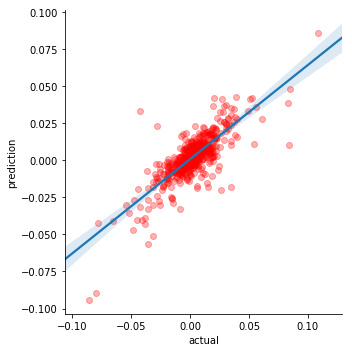

In [56]:
sbn_plot = sbn.lmplot('actual','prediction',data=pred, scatter_kws={'alpha':0.3, 'color':'red'})
#sbn_plot.save_fig('')

In [59]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [60]:
t.regress_model(model_name = 'BMIT_MOMIT')
res = t.get_results()
pred = t.get_prediction()
#t.results_to_latex('res_q5')
res

,HML,MKT,SMB,WML,intercept,r2
BMIT_MOMIT,0.169831,-0.017657,0.065336,0.209426,0.000144,0.54364


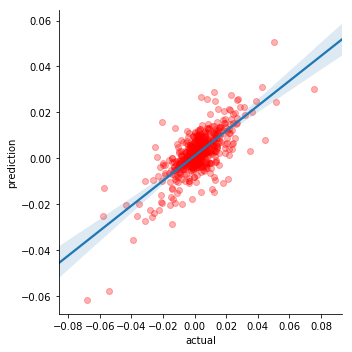

In [61]:
sbn_plot = sbn.lmplot('actual','prediction',data=pred, scatter_kws={'alpha':0.3, 'color':'red'})
#sbn_plot.save_fig('')